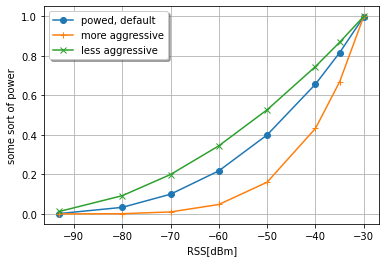

0.9996556813173788 0.9974440993048238 0.9993536385887772


In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt


def adjust_rssi(rssi_in): 
    min_rssi, exponent, scaler = adjust_rssi_params  
    rss_out = []
    if type(rssi_in) is int:
        rssi_in = [rssi_in]
    assert (type(rssi_in) is list), "RSS muste be int or list of ints"

    for rssi_val in rssi_in:
        if rssi_val < 0 and rssi_val > min_rssi:
            positive = rssi_val - min_rssi
            rssi = scaler * pow(-positive/min_rssi, exponent)
        else:
            rssi = 0
        rss_out.append(rssi)
    return rss_out


p = [-93, -80, -70, -60, -50, -40, -35, -30]


# from Sospedra Comprehensive paper, but scaled to 0.0-1.0
adjust_rssi_params = -100, math.e, 2.63
ae = np.array(adjust_rssi(p))

adjust_rssi_params = -100, 2.0*math.e, 6.95
a2e = np.array(adjust_rssi(p))

adjust_rssi_params = -100, 0.7*math.e, 1.97
a1e = np.array(adjust_rssi(p))

plt.plot(p, ae, "o-", label='powed, default')
plt.plot(p, a2e, "+-", label='more aggressive')
plt.plot(p, a1e, "x-", label='less aggressive')
plt.legend(loc="upper left",shadow=True, fancybox=True)
plt.xlabel('RSS[dBm]')
plt.ylabel('some sort of power')
plt.grid(True)
plt.show()

print(a2e[-1], ae[-1], a1e[-1])
